# PyZeta Teaser

## Imports

In [10]:
from typing import List

import numpy as np
import matplotlib.pyplot as plt

from pyzeal.rootfinders.rootfinder import RootFinder
from pyzeal.pyzeal_types.algorithm_types import AlgorithmTypes
from pyzeal.pyzeal_types.estimator_types import EstimatorTypes

from pyzeta.core.pyzeta_types.function_systems import FunctionSystemType

from pyzeta.framework.initialization.initialization_handler import (
    PyZetaInitializationHandler,
)
from pyzeta.core.zetas.selberg_zeta import SelbergZeta

PyZetaInitializationHandler.initPyZetaServices()


## Hyperbolic Cylinder Resonances

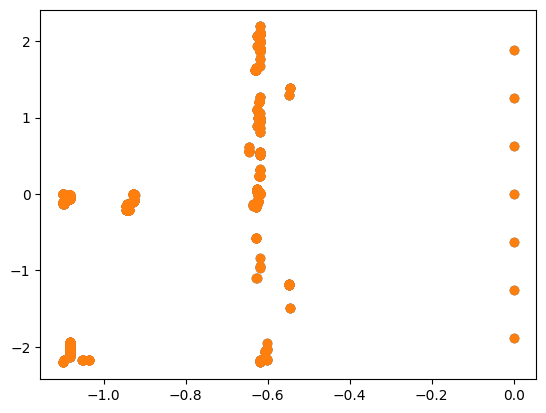

In [13]:
# calculate quantum resonances for Schottky and flow adapted cylinders
initArgs = {"funnelWidth": 10.0, "rotate": False}
width = initArgs["funnelWidth"]
nMax = 8

# TODO: refactor into functions; call on separate cells!
for systemType in [
    FunctionSystemType.HYPERBOLIC_CYLINDER,
    FunctionSystemType.FLOW_CYLINDER,
]:
    zeta = SelbergZeta(
        functionSystem=FunctionSystemType.HYPERBOLIC_CYLINDER,
        systemInitArgs=initArgs,
    )

    finder = RootFinder(
        f=lambda s: zeta(s, nMax=nMax),
        algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
        estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
    )

    finder.calculateRoots(
        reRan=(-1.1, 1.1), imRan=(-2.2, 2.2), precision=(3, 2)
    )

    plt.scatter(finder.roots.real, finder.roots.imag)


In [14]:
# calculate classical resonances for Schottky and flow adapted cylinders

## Funneled Torus Resonances

In [2]:
# calculate qm and cl resonances around delta-1 for both coordinate choices


## Hyperbolic Cylinder Ruelle Distributions

In [4]:
# calculate Ruelle distributions at delta-1 for Schottky and flow-adapted
# plot Poincare section and fundamental domain side-by-side


## Funneled Torus Ruelle Distributions

In [6]:
# calculate Ruelle distributions at delta-1 for both coordinate choices
# plot Poincare section and fundamental domain side-by-side
